# **HiBlu**: LLM Chatbot (EDA)

By Mavericks Team - Hacktiv8 | Data Resource: [FAQ Blu](https://blubybcadigital.id/info/faq)

---

# Introduction

HiBlu is a customized LLM chatbot model created specifically for Blu, a digital banking service. HiBlu is designed to offer prompt and accurate responses to inquiries from customers and potential customers regarding Blu services, to improve response time, efficiency, and user experience. This LLM chatbot model serves as the initial prototype, with the expectation that it will be implemented across all Blu services in the future. The documentation for this prototype will also feature a comparison of the modeling results between the RAG LLM,  fine-tuned LLM, and RAFT LLM models.

# Libraries

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize

# Data Loading

In [2]:
hiblu = pd.read_csv('FAQ_cleaned.csv', index_col=False)
hiblu.head()

,Question,Answer
0,Apa itu blu?,blu merupakan aplikasi mobile banking dari BCA...
1,Apa perbedaan blu dengan BCA Digital?,blu adalah aplikasi mobile banking milik BCA D...
2,Apa perbedaan BCA Digital dengan BCA?,"BCA Digital merupakan anak perusahaan BCA, bag..."
3,Apa keuntungan pakai aplikasi blu?,"Gak terbatas ruang dan waktu, aplikasi blu bis..."
4,Apakah blu punya kantor cabang offline?,"blu gak punya kantor cabang offline, tapi tena..."


In [3]:
hiblu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  500 non-null    object
 1   Answer    500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


The dataset above is the result of scraping from the [FAQ Blu page](https://blubybcadigital.id/info/faq). Subsequently, the scraped data underwent manual data cleaning (due to numerous specific cases requiring manual handling). Therefore, the dataset loaded above is clean, free of missing values, and contains 500 FAQs that will serve as guidelines for modeling the HiBlu LLM Chatbot.

# EDA

In this stage, we will conduct data exploration related to the Blu site, characteristics of the FAQ dataset, and frequently occurring words in the FAQ dataset.

## A. Market Characteristics

Exploring data regarding traffic on the Blu website. The data reference is taken from `Similarweb`, which is a digital intelligence platform related to website performance, website traffic data analysis, and more.

<center><img src="https://imgtr.ee/images/2024/07/03/c97b9085acffdeac0eab6841e199ebb7.png" alt="c97b9085acffdeac0eab6841e199ebb7.png" border="0" /></center>

The data visualization above provides an overview of the demographics of visitors to the **blu** website, based on data gathered by `Similarweb`. It shows that the majority of age classifications among **blu** website visitors are dominated by Gen Z (26.2%) and Millennials (38.4%). Additionally, from the data analysis above, it is interesting to note that the majority of **blu** website visitors are male, despite having only a 6% difference compared to female visitors.

<center><img src="https://imgtr.ee/images/2024/07/03/9039d1e9ef41be541b0029fed6dbf82c.png" alt="9039d1e9ef41be541b0029fed6dbf82c.png" border="0" /></center>

The visualization above depicts the traffic data on the **blu** website, which is predominantly driven by visitors through organic search on search engine pages. Additionally, from the data presented, it shows that visitors typically view an average of 2 pages per visit, spending an average of 4 minutes per session. Based on these analyses, it is possible that visitors are navigating to the **blu** website to access the FAQ page `(Home -> FAQ)` and seek answers to their inquiries or issues. The high traffic to the FAQ page is reasonable given that **blu** is a newcomer in the digital banking sector, where there is likely a significant lack of customer/prospective customer awareness about **blu**'s product knowledge.

## B. Data Source Characteristics 

The dataset used for modeling the HiBlu LLM consists of scraped data from the [FAQ Blu page](https://blubybcadigital.id/info/faq), comprising approximately `500` questions and answers related to **blu**. Since **blu** is a digital bank newly established by BCA in 2021, the characteristics of the dataset are as follows:

| Topik | Information |
| --- | --- |
| Blu | Basic questions about blu. Such as what blu is, how it differs from BCA Bank, benefits of using blu, and more. |
| Registrasi | Complete guide on how to register a new account. |
| Keamanan | 	Explanation of the security features offered by blu. |
| bluAccount | 	Explanation of bluAccount, the main account used for transactions. |
| bluSaving | Personalizable savings account features. |
| bluGether | Shared digital savings account feature for up to 49 users. |
| bluDeposit | Explanation of bluDeposit, the fixed deposit service offered by blu. |
| bluBisnis | 	Explanation of bluBisnis, separate business accounts. |
| Kartu | Explanation of blu transaction card types, bluVirtual and bluDebit. |
| bluLoyalty | Explanation of the loyalty program for blu customers. |
| bluExtraCash | Introduction to blu's unsecured loan service. |
| bluInvest | Features of blu's collaboration with investment platforms Moduit and FUNDtastic. |
| bluInsurance | Collaboration feature with BCA Life insurance products. |

Therefore, it is expected that the dataset compilation above is sufficient as a guideline for the `first prototype` of the HiBlu LLM Chatbot product.

## C. Word Cloud

### Most Frequent Question Words

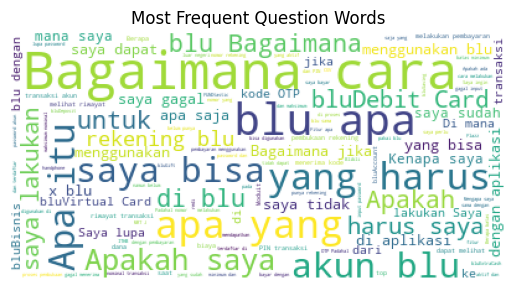

In [4]:
text = hiblu['Question'].values
wordcloud = WordCloud(background_color="white").generate(" ".join(text))

# Word cloud plotting.
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Most Frequent Question Words')
plt.show()

The word cloud visualization for the `Question` column shows that the most frequently appearing words are `Bagaimana` (How) and `Apa` (What). This indicates that **blu** customers/prospective customers are still unfamiliar and have many uncertainties regarding procedures and **blu** product knowledge.

### Most Frequent Answer Words

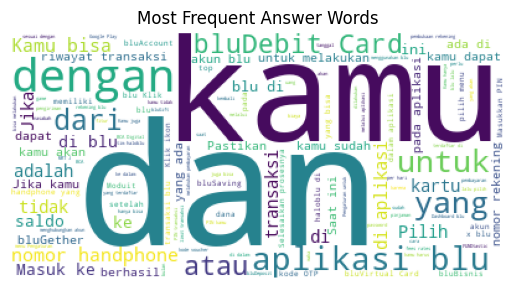

In [5]:
text = hiblu['Answer'].values
wordcloud = WordCloud(background_color="white").generate(" ".join(text))

# Word cloud plotting.
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Most Frequent Answer Words')
plt.show()

The word cloud visualization for frequently occurring words in the `Answer` column shows that the word `kamu` (you) appears prominently. This indicates that the answers on the **blu** FAQ page have a more human-like tone and a personalized approach.

## D. Word Count

In [8]:
# Calculate the word count on the Question column.
hiblu['Question_word_count'] = hiblu['Question'].apply(lambda x: len(nltk.word_tokenize(x)))

# Show minimum, maximum, average of the word count.
print('Kolom Question')
print('Minimum word count: ', hiblu['Question_word_count'].min())
print('Maximum word count: ', hiblu['Question_word_count'].max())
print('Average word count: ', hiblu['Question_word_count'].mean())

Kolom Question
Minimum word count:  1
Maximum word count:  27
Average word count:  10.808


In [9]:
# Calculate the word count on the Answer column.
hiblu['Answer_word_count'] = hiblu['Answer'].apply(lambda x: len(nltk.word_tokenize(x)))

# Show minimum, maximum, average of the word count.
print('Kolom Answer')
print('Minimum word count: ', hiblu['Answer_word_count'].min())
print('Maximum word count: ', hiblu['Answer_word_count'].max())
print('Average word count: ', hiblu['Answer_word_count'].mean())

Kolom Answer
Minimum word count:  7
Maximum word count:  216
Average word count:  42.276


From the word count analysis above, it is concluded that the `Answer` column has a longer word count compared to the `Question` column. This is evidenced by the significant difference in the average number of words per column: the `Answer` column averages `42 words` per answer with a maximum of `216 words`, whereas the `Question` column averages only `10 words` per question with a maximum of `27 words`.